# Linear Regression

- Hypothesis: $H(x) = Wx + b$
- cost : $cost(W, b) = \frac{1}{m} \sum^{m}_{i = 1}(H(x^{(i)})- y^{(i)})^2$

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

# w의 변화에 다라서 cost가 어떻게 변화하는지 살펴보기

In [2]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

In [34]:
W_ex = np.linspace(-5, 7, 1000)
cost_l = []
for W in W_ex:
    hypothesis = W * x_train
    cost = torch.mean((hypothesis - y_train) **2 )
    cost_l.append(cost.item())

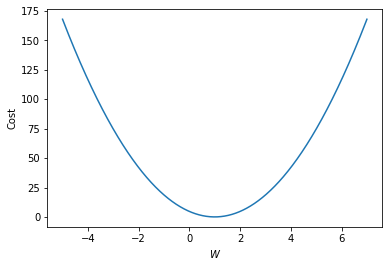

In [35]:
plt.plot(W_ex, cost_l)
plt.xlabel('$W$')
plt.ylabel('Cost')
plt.show()

In [3]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [4]:
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


# weight init

In [5]:
W = torch.zeros(1, requires_grad = True) ## 학습시킬 변수라는 것을 암시함.
print(W)

tensor([0.], requires_grad=True)


In [6]:
b = torch.zeros(1, requires_grad = True)
print(b)

tensor([0.], requires_grad=True)


# hypothesis
$H(x) = Wx + b$ 

In [7]:
hypothesis = x_train * W+ b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


# cost

$cost(W, b)= \frac{1}{m} \sum^{m}_{i=1}(H(x^{(i)}) - y ^ {(i)})^2  $

In [8]:
print(hypothesis), print(y_train)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)
tensor([[1.],
        [2.],
        [3.]])


(None, None)

In [9]:
print(hypothesis - y_train)

tensor([[-1.],
        [-2.],
        [-3.]], grad_fn=<SubBackward0>)


In [10]:
print((hypothesis - y_train) ** 2)

tensor([[1.],
        [4.],
        [9.]], grad_fn=<PowBackward0>)


In [11]:
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(4.6667, grad_fn=<MeanBackward0>)


# Gradient Descent

- W와 COST 사이의 관계를 그래프로 그려보기.
- COST가 제일 낮아지는 지점 도달하기 위해서는 W가 어떤 값이여야 할까?

$$\frac{\delta  cost}{\delta W} = \nabla W  $$

In [12]:
optimizer = optim.SGD([W, b], lr = 0.01)

In [13]:
optimizer.zero_grad()
cost.backward()
optimizer.step()

In [14]:
print(W)
print(b)

tensor([0.0933], requires_grad=True)
tensor([0.0400], requires_grad=True)


In [15]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.1333],
        [0.2267],
        [0.3200]], grad_fn=<AddBackward0>)


In [17]:
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(3.6927, grad_fn=<MeanBackward0>)


# GD 더 깊이 이해하기

In [25]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

W = torch.zeros(1)

lr = 0.1

nb_epochs = 10

for epoch in range(nb_epochs + 1):
    
    hypothesis = x_train * W
    
    cost = torch.mean((hypothesis - y_train) ** 2)
    gradient = torch.sum((W * x_train- y_train) * x_train)
    
    print(epoch, W.item(), cost.item())
    
    W -= lr * gradient

0 0.0 4.666666507720947
1 1.399999976158142 0.7466664910316467
2 0.8400000333786011 0.11946665495634079
3 1.0640000104904175 0.0191146582365036
4 0.9744000434875488 0.00305833644233644
5 1.0102399587631226 0.0004893290461041033
6 0.9959040284156799 7.829209789633751e-05
7 1.001638412475586 1.2527179023891222e-05
8 0.9993446469306946 2.0041973129991675e-06
9 1.0002621412277222 3.206215808404522e-07
10 0.9998951554298401 5.128529423359396e-08


# 전체 코드로 학습시켜보기

In [21]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

W = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)
optimizer = optim.SGD([W, b], lr = 0.01)

nb_epochs = 1000
for epoch in range(1, nb_epochs + 1):
    hypothesis = x_train * W + b
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    optimizer.zero_grad() ## gradient를 0으로 초기화
    cost.backward() ## gradient를 계산
    optimizer.step() ## gradient descent 계산

# Multivariate Linear Regression

- 복수의 값에서 예측치를 어떻게?

In [36]:
# 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [39]:
w1 = torch.zeros(1, requires_grad = True)
w2 = torch.zeros(1, requires_grad = True)
w3 = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

optimizer = optim.SGD([w1, w2, w3, b], lr = 1e-5)

nb_epochs = 1000

for epoch in range(nb_epochs + 1):
    
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b
    
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w3.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 0.294 w2: 0.297 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.676 w3: 0.676 b: 0.008 Cost: 1.563634
Epoch  200/1000 w1: 0.679 w2: 0.677 w3: 0.677 b: 0.008 Cost: 1.497607
Epoch  300/1000 w1: 0.684 w2: 0.677 w3: 0.677 b: 0.008 Cost: 1.435026
Epoch  400/1000 w1: 0.689 w2: 0.678 w3: 0.678 b: 0.008 Cost: 1.375730
Epoch  500/1000 w1: 0.694 w2: 0.678 w3: 0.678 b: 0.009 Cost: 1.319511
Epoch  600/1000 w1: 0.699 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.215696
Epoch  800/1000 w1: 0.709 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.167818
Epoch  900/1000 w1: 0.713 w2: 0.680 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.680 w3: 0.680 b: 0.009 Cost: 1.079378


# 행렬로 표현하기

In [40]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [41]:
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


In [43]:
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad = True)

optimizer = optim.SGD([W, b], lr = 1e-5)

nb_epochs = 20

for epoch in range(nb_epochs + 1):
    
    hypothesis = x_train.matmul(W) + b
    
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([67.2578, 80.8397, 79.6523, 86.7394, 61.6605]) Cost: 9298.520508
Epoch    2/20 hypothesis: tensor([104.9128, 126.0990, 124.2466, 135.3015,  96.1821]) Cost: 2915.712891
Epoch    3/20 hypothesis: tensor([125.9942, 151.4381, 149.2133, 162.4896, 115.5097]) Cost: 915.040527
Epoch    4/20 hypothesis: tensor([137.7968, 165.6247, 163.1911, 177.7112, 126.3307]) Cost: 287.936005
Epoch    5/20 hypothesis: tensor([144.4044, 173.5674, 171.0168, 186.2332, 132.3891]) Cost: 91.371010
Epoch    6/20 hypothesis: tensor([148.1035, 178.0144, 175.3980, 191.0042, 135.7812]) Cost: 29.758139
Epoch    7/20 hypothesis: tensor([150.1744, 180.5042, 177.8508, 193.6753, 137.6805]) Cost: 10.445305
Epoch    8/20 hypothesis: tensor([151.3336, 181.8983, 179.2240, 195.1707, 138.7440]) Cost: 4.391228
Epoch    9/20 hypothesis: tensor([151.9824, 182.6789, 179.9928, 196.0079, 139.3396]) Cost: 2.493135
Epoch   10/20 hypo

# nn.Module 사용해보기

In [52]:
class LinearRegrssionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)
        
    def forward(self, x):
        return self.linear(x)

In [56]:
class MultivariateRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,1)
        
    def forward(self, x):
        return self.linear(x)

In [49]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [60]:
model = MultivariateRegressionModel()

optimizer = optim.SGD(model.parameters(), lr = 1e-5)

nb_epochs = 20

for epoch in range(nb_epochs + 1):
    prediction = model(x_train)
    
    ## nn.Module을 쓰면 훨씬 더 쉽게 학습하는게 가능. 
    # 또한 l2_loss나 smooth_l1_loss 등을 바꿔서 사용하는 것도 가능하다. 
    cost = F.mse_loss(prediction, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/20 Cost: 26305.109375
Epoch    1/20 Cost: 8251.716797
Epoch    2/20 Cost: 2592.932617
Epoch    3/20 Cost: 819.201538
Epoch    4/20 Cost: 263.227234
Epoch    5/20 Cost: 88.955406
Epoch    6/20 Cost: 34.327072
Epoch    7/20 Cost: 17.200548
Epoch    8/20 Cost: 11.828802
Epoch    9/20 Cost: 10.141674
Epoch   10/20 Cost: 9.609408
Epoch   11/20 Cost: 9.439158
Epoch   12/20 Cost: 9.382443
Epoch   13/20 Cost: 9.361204
Epoch   14/20 Cost: 9.351163
Epoch   15/20 Cost: 9.344614
Epoch   16/20 Cost: 9.339144
Epoch   17/20 Cost: 9.334023
Epoch   18/20 Cost: 9.329059
Epoch   19/20 Cost: 9.324114
Epoch   20/20 Cost: 9.319161


# minibatch
- 데이터셋에 있는 정보가 너무 많으면 한번에 학습 시키는 것은 어려움.
- 따라서 일분을 사용해서 학습하는 게 minibatch
- 데이터를 균일하게 나눠서 사용한다.

## minibatch의 효과

 - 업데이트를 조금 더 빠르게 하는게 가능하다. -updata의 주기가 빨라지는 효과
 - 전체 데이터를 쓰지 않아서 잘못된 방향으로 학습 할 수도 있다. 
 

In [61]:
from torch.utils.data import Dataset

In [65]:

## custom data set은 mini batch를 하는데 사용된다. 
class CustomDataset(Dataset):
    def __init__(self):
        self.x_data =[[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]
    
    def __len__(self):
        # 총 데이터의 수를 배출
        
        return len(self.x_data)
    
    def __getitem__(self, idx):
        # 특정 index를 받을때 그에 상응하는 입출력 데이터 배출
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.Float_Tensor(self.y_data[idx])
        
        return x, y

In [64]:
dataset = CustomDataset()

In [71]:
from torch.utils.data import DataLoader

dataloader = DataLoader(
    dataset,
    batch_size = 2,# 통상적으로 2의 제곱수로 설정
    shuffle = True) # 데이터가 학습되는 순서가 영향을 미칠 수도 있기에 shuffle은 가능한 true로 선택

In [72]:
nb_epochs = 20

for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        
        prediction = model(x_train)
        
        cost = F.mse_loss(prediction, y_train)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('epoch {}/{} batch {}/{} cost {}'.format(epoch, nb_epochs, batch_idx +1, len(dataloader), cost.item()))

AttributeError: module 'torch' has no attribute 'Float_Tensor'